In [23]:
from keras.models import Model
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Lambda
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
import tensorflow as tf
import keras
import tensorflow
from keras import layers
import numpy as np

In [24]:
# 10 bands, 19 loudness levels, 126 signal length, 1000 cycles

In [25]:
"""
input shape  = (19,10,126)
output shape = (19,1)
"""

'\ninput shape  = (19,10,126)\noutput shape = (19,1)\n'

In [26]:
inputs = Input(shape = (19,10,126))
x = Conv2D(32, (3, 3), padding="same")(inputs)
x = Activation("relu")(x)
x = BatchNormalization(axis=-1)(x)
x = MaxPooling2D(pool_size=(3,3))(x)
x = Dropout(0.25)(x)
x = Conv2D(32, (3, 3), padding="same")(x)
x = Activation("relu")(x)
x = BatchNormalization(axis=-1)(x)
x = MaxPooling2D(pool_size=(2, 2),padding = 'same')(x)
x = Dropout(0.25)(x)
x = Conv2D(32, (3, 3), padding="same")(x)
x = Activation("relu")(x)
x = BatchNormalization(axis=-1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(128)(x)
x = Activation("relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(19)(x)
x = Activation("linear", name="final-output")(x)


In [27]:
model = keras.Model(inputs = inputs, outputs = x,name = "multi-output-CNN")

In [28]:
model.summary()

Model: "multi-output-CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 19, 10, 126)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 19, 10, 32)        36320     
                                                                 
 activation_4 (Activation)   (None, 19, 10, 32)        0         
                                                                 
 batch_normalization_4 (Batc  (None, 19, 10, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 3, 32)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 6, 3, 32)     

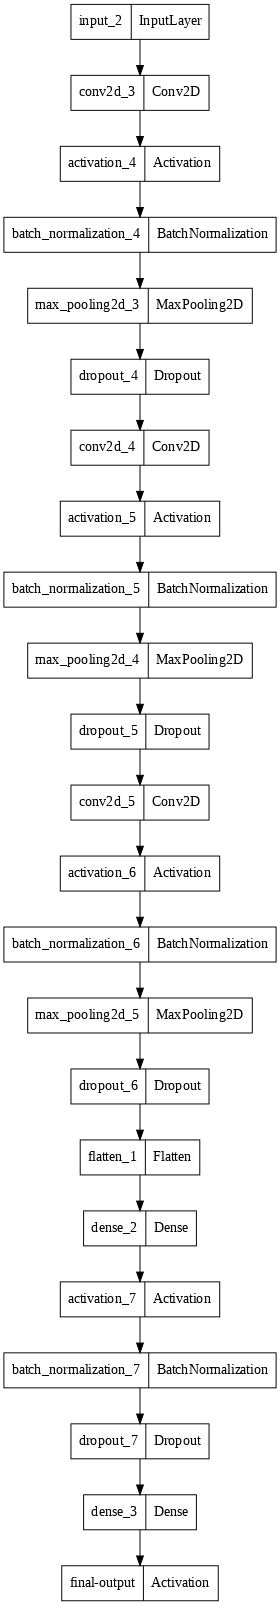

In [29]:
from tensorflow.keras.utils import plot_model
plot_model(
    model,
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=70,
    layer_range=None,
    show_layer_activations=False,
)

In [30]:
cd drive/MyDrive

[Errno 2] No such file or directory: 'drive/MyDrive'
/content/drive/MyDrive


In [ ]:
x = np.load('ewt_x_n1_cnn.npy')
y = np.load('ewt_y_n1_cnn.npy')

In [ ]:
x.shape

(1000, 19, 10, 126)

In [ ]:
y.shape

(1000, 19)

In [18]:
import numpy as np
import tensorflow as tf
import tensorflow
from tensorflow import keras
from keras import layers
from tensorflow.keras.utils import plot_model
import pandas as pd
import matplotlib.pyplot as plt
from keras import regularizers, optimizers
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError,MeanSquaredError,MeanAbsoluteError
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import os

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.85)

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate = 1e-4)
model.compile(loss='mean_squared_error', optimizer = optimizer,metrics = ['MeanAbsoluteError','MeanSquaredError']) # Try SGD, adam, adagrad and compare!!!
file = 'model_best_cnn_multioutput.h5'
es = EarlyStopping(monitor='val_loss', mode='min', verbose=5, patience=10)
checkpoint = ModelCheckpoint(filepath=file, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint,es]


In [ ]:
history = model.fit(x_train,y_train, epochs=700, batch_size=16, verbose=2,validation_data = (x_test,y_test), callbacks = callbacks)

Epoch 1/700

Epoch 1: val_loss improved from inf to 2.28797, saving model to model_best_cnn_multioutput.h5
54/54 - 4s - loss: 3.7887 - mean_absolute_error: 1.5382 - mean_squared_error: 3.7887 - val_loss: 2.2880 - val_mean_absolute_error: 1.1449 - val_mean_squared_error: 2.2880 - 4s/epoch - 67ms/step
Epoch 2/700

Epoch 2: val_loss improved from 2.28797 to 1.07782, saving model to model_best_cnn_multioutput.h5
54/54 - 2s - loss: 3.5823 - mean_absolute_error: 1.4943 - mean_squared_error: 3.5823 - val_loss: 1.0778 - val_mean_absolute_error: 0.8019 - val_mean_squared_error: 1.0778 - 2s/epoch - 31ms/step
Epoch 3/700

Epoch 3: val_loss improved from 1.07782 to 0.96552, saving model to model_best_cnn_multioutput.h5
54/54 - 2s - loss: 3.2889 - mean_absolute_error: 1.4276 - mean_squared_error: 3.2889 - val_loss: 0.9655 - val_mean_absolute_error: 0.7789 - val_mean_squared_error: 0.9655 - 2s/epoch - 32ms/step
Epoch 4/700

Epoch 4: val_loss improved from 0.96552 to 0.94452, saving model to model_be

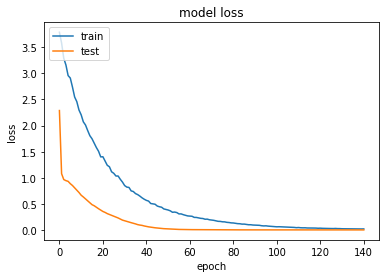

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 16ms/step - loss: 4.4586e-04 - mean_absolute_error: 0.0150 - mean_squared_error: 4.4586e-04


[0.00044585621799342334, 0.014956226572394371, 0.00044585621799342334]

In [ ]:
preds = model.predict(x_test)

5/5 [==============================] - 0s 15ms/step


In [ ]:
preds[0]

array([-0.66485196, -0.543828  , -0.5388898 , -0.6600853 , -0.6754199 ,
       -0.13813967,  0.08374894,  0.2019358 ,  0.45798203,  0.41991693,
        0.5164958 ,  0.68329066,  0.72848505,  0.7519524 ,  1.0602856 ,
        1.2252446 ,  1.3209419 ,  1.6088269 ,  1.7194026 ], dtype=float32)

In [16]:
x = np.load('ewt_x_n1_cnn_2.npy')
y = np.load('ewt_y_n1_cnn_2.npy')

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.85)

In [20]:
optimizer = keras.optimizers.Adam(learning_rate = 1e-4)
model.compile(loss='mean_squared_error', optimizer = optimizer,metrics = ['MeanAbsoluteError','MeanSquaredError']) # Try SGD, adam, adagrad and compare!!!
file = 'model_best_cnn_multioutput_more_data.h5'
es = EarlyStopping(monitor='val_loss', mode='min', verbose=5, patience=10)
checkpoint = ModelCheckpoint(filepath=file, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint,es]


In [21]:
history2 = model.fit(x_train,y_train, epochs=700, batch_size=16, verbose=2,validation_data = (x_test,y_test), callbacks = callbacks)

Epoch 1/700

Epoch 1: val_loss improved from inf to 1.02120, saving model to model_best_cnn_multioutput_more_data.h5
107/107 - 5s - loss: 3.8686 - mean_absolute_error: 1.5431 - mean_squared_error: 3.8686 - val_loss: 1.0212 - val_mean_absolute_error: 0.7918 - val_mean_squared_error: 1.0212 - 5s/epoch - 48ms/step
Epoch 2/700

Epoch 2: val_loss improved from 1.02120 to 0.79645, saving model to model_best_cnn_multioutput_more_data.h5
107/107 - 3s - loss: 3.4392 - mean_absolute_error: 1.4570 - mean_squared_error: 3.4392 - val_loss: 0.7965 - val_mean_absolute_error: 0.7451 - val_mean_squared_error: 0.7965 - 3s/epoch - 29ms/step
Epoch 3/700

Epoch 3: val_loss improved from 0.79645 to 0.76589, saving model to model_best_cnn_multioutput_more_data.h5
107/107 - 3s - loss: 3.0506 - mean_absolute_error: 1.3738 - mean_squared_error: 3.0506 - val_loss: 0.7659 - val_mean_absolute_error: 0.7446 - val_mean_squared_error: 0.7659 - 3s/epoch - 29ms/step
Epoch 4/700

Epoch 4: val_loss improved from 0.76589 

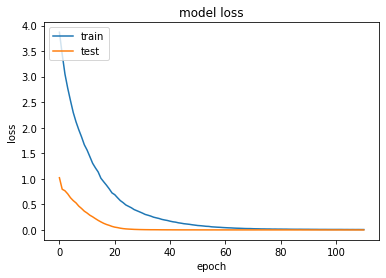

In [22]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
x = np.load('ewt_x_n1_cnn_3.npy')
y = np.load('ewt_y_n1_cnn_3.npy')

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.85)

In [33]:
optimizer = keras.optimizers.Adam(learning_rate = 1e-4)
model.compile(loss='mean_squared_error', optimizer = optimizer,metrics = ['MeanAbsoluteError','MeanSquaredError']) # Try SGD, adam, adagrad and compare!!!
file = 'model_best_cnn_multioutput_more_data.h5'
es = EarlyStopping(monitor='val_loss', mode='min', verbose=5, patience=20)
checkpoint = ModelCheckpoint(filepath=file, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint,es]


In [34]:
history3 = model.fit(x_train,y_train, epochs=700, batch_size=16, verbose=2,validation_data = (x_test,y_test), callbacks = callbacks)

Epoch 1/700

Epoch 1: val_loss improved from inf to 0.91576, saving model to model_best_cnn_multioutput_more_data.h5
160/160 - 7s - loss: 3.7146 - mean_absolute_error: 1.5090 - mean_squared_error: 3.7146 - val_loss: 0.9158 - val_mean_absolute_error: 0.7818 - val_mean_squared_error: 0.9158 - 7s/epoch - 41ms/step
Epoch 2/700

Epoch 2: val_loss improved from 0.91576 to 0.88324, saving model to model_best_cnn_multioutput_more_data.h5
160/160 - 5s - loss: 3.1624 - mean_absolute_error: 1.3933 - mean_squared_error: 3.1624 - val_loss: 0.8832 - val_mean_absolute_error: 0.7798 - val_mean_squared_error: 0.8832 - 5s/epoch - 30ms/step
Epoch 3/700

Epoch 3: val_loss improved from 0.88324 to 0.81408, saving model to model_best_cnn_multioutput_more_data.h5
160/160 - 5s - loss: 2.7261 - mean_absolute_error: 1.2938 - mean_squared_error: 2.7261 - val_loss: 0.8141 - val_mean_absolute_error: 0.7492 - val_mean_squared_error: 0.8141 - 5s/epoch - 29ms/step
Epoch 4/700

Epoch 4: val_loss improved from 0.81408 

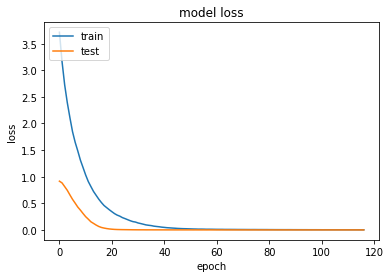

In [35]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
# How to proceed for recordings where data for all the loudness levels is not present ? Use data from previous recordings  \\ Not now
# How to go about taking into account other persons where CMM data is not present upto a certain loudness level(considering we will build only 1 model) || build individual speaker models